<a href="https://colab.research.google.com/github/sreeniSudharsan/FoodVision/blob/main/FoodVision_Big.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FoodVision_Big



In [1]:
## Downgrading tensorflow verison
!pip install tensorflow==2.4.1
import tensorflow as tf
tf.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.4.1


'2.12.0'

###checking the gpu...
  > Using mixed precision in this model, thus need to check if we got the gpu for it
  > Ideally a Tesla-T4 would be the ideal gpu 

In [2]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-7990b663-147a-1655-cb63-4f8fe8bf001f)


### Getting the helper functions ready

In [3]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/TensorFlow Course/Food_Vision_Big_TM ')

In [4]:
from helper import make_confusion_matrix, create_tensorboard_callback, compare_historys, plot_loss_curves, unzip_data

## TensorFlow Datasets to Download our Data0

In [5]:
#Get TensorFlow Datasets
import tensorflow_datasets as tfds 



In [6]:
# list all available datasets

datasets_list = tfds.list_builders() #get all available datasets in TFDS
print("food101" in datasets_list) # is our target dataset in the list of TFDS dataset

True


In [7]:
# load in the data 

(train_data, test_data), ds_info = tfds.load(name="food101", 
                                             split=["train", "validation"],
                                             shuffle_files = True, 
                                             as_supervised = True, #data gets returned in tuple format (data, label)
                                             with_info = True
                                             )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteX87OPB/food101-train.tfrecord*...:   0%|          …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteX87OPB/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [8]:
#Looking at our data

ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [9]:
# Get the class names

class_names = ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Exploring the Food101 data from TensorFlow Datasets

> Look into class_names

> Shape of our input_data

> The datatype of our input data

> What the labels look like (e.g. are they one hot encoded or label encoded)

> Labels match with class_names?

In [10]:
# sampling of training data

train_one_sample = train_data.take(1) #samples are in format (image_tensor, label)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
# Output info about our training sample 
for image, label in train_one_sample:
  print(f"""
  Target class from Food101 : {label}
  Class Name (Str form): {class_names[label.numpy()]}
  """)


  Target class from Food101 : 98
  Class Name (Str form): tiramisu
  


In [12]:
# What does our image tensor look like>
image

<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0],
        ...,
        [  0,   3,   0],
        [  0,   4,   0],
        [  0,   4,   0]],

       [[  2,   2,   0],
        [  2,   2,   0],
        [  3,   3,   1],
        ...,
        [  1,   3,   0],
        [  0,   4,   0],
        [  0,   4,   0]],

       [[  5,   6,   1],
        [  5,   6,   1],
        [  5,   6,   1],
        ...,
        [  1,   3,   0],
        [  0,   4,   0],
        [  0,   5,   1]],

       ...,

       [[143,  75,  10],
        [149,  81,  16],
        [150,  85,  19],
        ...,
        [162,  88,  25],
        [150,  79,  17],
        [135,  65,   5]],

       [[144,  76,  11],
        [152,  84,  19],
        [145,  80,  16],
        ...,
        [126,  60,  12],
        [111,  50,   3],
        [ 95,  37,   0]],

       [[145,  77,  14],
        [150,  82,  19],
        [139,  74,  10],
        ...,
        [ 89,  35,   

In [13]:

# What are the min and max values of our image tensor?
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

## plot an image from TensorFlow Datasets

(-0.5, 511.5, 340.5, -0.5)

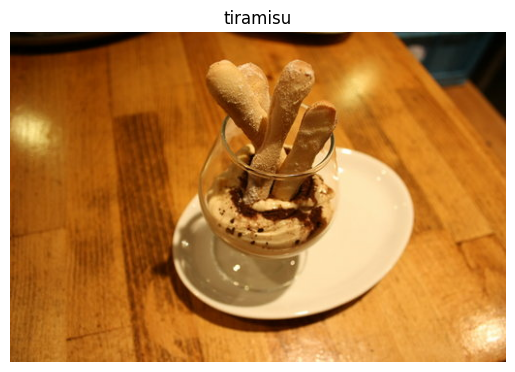

In [14]:
#Plot an image tensor

import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()]) # Add title to image to verify the label is associated with the right image
plt.axis(False)

## Create Preprocessing functions for our data

> Data Information 

  The data we got on our hands right now needs to be preprocessed a bit
  to use our image_from_directory function. Right now our data looks like:

  * in `unint8` datatype
  * not scaled 
  * comprised of different size tensors (different sized images)



In [15]:
# Convert uint8 -> float32 dtype 

def preprocess_img(image, label, img_shape=224):

  '''
  Converts image datatype from 'uint8' -> 'float32' and reshapes 
  image to [img_shape, img_shape, color_channels]

  '''
  image = tf.image.resize(image, [img_shape, img_shape])
  # image = image/255, #rescale for image values- this is not rquired since we're using EfficientNetB0 which already has a rescale layer 
  return tf.cast(image, tf.float32), label 


In [16]:
#preprocess a sample and check outputs
prep_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing: \n {image[:2]}...,\nShape: {image.shape}, \nDatatype:{image.dtype}\n")
print(f"Image after preprocessing: \n {prep_img[:2]}...,\nShape: {prep_img.shape}, \nDatatype:{prep_img.dtype}\n")

Image before preprocessing: 
 [[[2 2 0]
  [2 2 0]
  [2 2 0]
  ...
  [0 3 0]
  [0 4 0]
  [0 4 0]]

 [[2 2 0]
  [2 2 0]
  [3 3 1]
  ...
  [1 3 0]
  [0 4 0]
  [0 4 0]]]...,
Shape: (341, 512, 3), 
Datatype:<dtype: 'uint8'>

Image after preprocessing: 
 [[[2.         2.         0.        ]
  [2.947226   2.947226   0.947226  ]
  [4.         5.         0.        ]
  ...
  [1.         3.         0.        ]
  [0.01865775 2.757497   0.        ]
  [0.         4.         0.        ]]

 [[4.350446   5.1339283  0.7834821 ]
  [4.566964   5.350446   1.        ]
  [4.783482   5.783482   0.7834821 ]
  ...
  [1.         3.         0.        ]
  [0.7989505  2.7989504  0.        ]
  [0.         4.2798424  0.27984235]]]...,
Shape: (224, 224, 3), 
Datatype:<dtype: 'float32'>



## Batch and prepare datasets

We're now going to make our data input pipleine run really fast.


In [17]:

# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [19]:
# create model checkpoint callback
ck_pt = "/content/drive/MyDrive/Colab Notebooks/TensorFlow Course/Food_Vision_Big_TM /model_checkpoints/cp.ckpt"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(ck_pt, monitor = "val_accuracy",
                                                      save_best_only = True,
                                                      save_weights_only = True,
                                                      verbose = 0) #don't print model being saved or not 
                  

## Setup mixed precision training 

In [33]:
# Turn on mixed precision training 

from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy("mixed_float16")

In [37]:


#Setup the base model and make trainable == False
base_model = tf.keras.applications.EfficientNetB4(include_top=False)
base_model.trainable = False

# Create functional model
INPUT_SHAPE = (224,224,3)
inputs = tf.keras.layers.Input(shape=INPUT_SHAPE, name = "input_layer")
x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "pooling_layer")(x)
x = tf.keras.layers.Dense(len(class_names))(x) #want one output neuron per class

#Mixed precision with output layer float32
outputs = tf.keras.layers.Activation("softmax", dtype = tf.float32, name = "softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)


#Compile
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["accuracy"])





In [22]:
len(class_names)

101

In [38]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, None, None, 1792)  17673823 
                                                                 
 pooling_layer (GlobalAverag  (None, 1792)             0         
 ePooling2D)                                                     
                                                                 
 dense_3 (Dense)             (None, 101)               181093    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 17,854,916
Trainable params: 181,093
Non-trai

In [39]:
## Checking layer dtype policy 

for layer in model.layers[1].layers[:20]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_4 False float32 <Policy "float32">
rescaling_6 False float32 <Policy "mixed_float16">
normalization_3 False float32 <Policy "mixed_float16">
rescaling_7 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <P

#Fit the feature extraction model 

In [41]:
history_1_feature_ext = model.fit(train_data, epochs = 5, 
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data, 
                                  validation_steps = .15 * len(test_data),
                                  callbacks = [create_tensorboard_callback(dir_name = "training_logs", experiment_name = "efficientneb4_101"),
                                               model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientneb4_101/20230403-133728
Epoch 1/5
2368/2368 [==============================] - 295s 120ms/step - loss: 1.7881 - accuracy: 0.5582 - val_loss: 1.2605 - val_accuracy: 0.6675
Epoch 2/5
2368/2368 [==============================] - 293s 121ms/step - loss: 1.3100 - accuracy: 0.6584 - val_loss: 1.1486 - val_accuracy: 0.6938
Epoch 3/5
2368/2368 [==============================] - 295s 123ms/step - loss: 1.1626 - accuracy: 0.6938 - val_loss: 1.1103 - val_accuracy: 0.7025
Epoch 4/5
2368/2368 [==============================] - 267s 111ms/step - loss: 1.0640 - accuracy: 0.7175 - val_loss: 1.0922 - val_accuracy: 0.7111
Epoch 5/5
2368/2368 [==============================] - 292s 122ms/step - loss: 0.9887 - accuracy: 0.7360 - val_loss: 1.0864 - val_accuracy: 0.7096


In [42]:
#Evaluate model (unsaved version) on whole test dataset 
results_feature_ext_model = model.evaluate(test_data)
results_feature_ext_model

790/790 [==============================] - 84s 106ms/step - loss: 1.0870 - accuracy: 0.7046


[1.0870201587677002, 0.7046336531639099]

## Save the whole model to file 

In [46]:
## Saving model to google drive 
import os 
save_dir = "/content/drive/MyDrive/Colab Notebooks/TensorFlow Course/Food_Vision_Big_TM/efficientnetb4_feature_ext_mixed_precision"
os.makedirs(save_dir)

#Save model
model.save(save_dir)

TypeError: ignored

In [ ]:
#load saved model 
load_saved = tf.keras.models.load_model(save_dir)


In [ ]:
#Check SavedModel policies 
for layer in load_saved.layers[1].layers[:20]:
  print(layer.name, layer.trainable, layer.dtype_policy)

In [ ]:
results_loaded_saved_model = loaded_saved.evaluate(test_data)
results_loaded_saved_model

In [ ]:
#Checking the model results between saved and loaded
assert np.isclose(results_feature_ext_model, results_loaded_saved_model).all(), "They are not close at all"

##Preparation for Fine Tuning

*Point* : since our version of tensorflow has some conflicts with saving one of the model layers, we shall be directly accessing the model without saving. Issue needs to be resolved soon. 

In [ ]:
##Now, load our previously saved feature ext model 

# model_2_pre = tf.keras.models.load_model(save_dir)


In [47]:
model_2 = model

###Ensuring our model is performing the same 

In [ ]:
# model_2_pre_results = model_2_pre.evaluate(test_data)
# model_2_pre_results 

In [48]:
# Unfreeze all layers 
for layer in model_2.layers:
  layer.trainable = True
  print(layer.name, layer.trainable, layer.dtype_policy)


input_layer True <Policy "float32">
efficientnetb4 True <Policy "mixed_float16">
pooling_layer True <Policy "mixed_float16">
dense_3 True <Policy "mixed_float16">
softmax_float32 True <Policy "float32">


In [ ]:
# Setting up an early stopping callback so that our training time does not become way too much

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                  patience = 4)

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/TensorFlow Course/Food_Vision_Big_TM/fine_tune_checkpoints"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                      save_best_only = True, 
                                                      monitor = "val_loss")

In [52]:
## Tuning the learning rate using the ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                  factor = 0.2,
                                                  patience = 2,
                                                  verbose = 1,
                                                  min_lr = 1e-7)

In [57]:
model_2.compile(loss = "sparse_categorical_crossentropy",
                    optimizer = tf.keras.optimizers.Adam(0.0001),
                    metrics = ["accuracy"])

In [1]:
model_2_history = model_2.fit(train_data, 
                                  epochs = 100,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps = int(0.15 * len(test_data)), #Since our data is in float
                                  callbacks = [create_tensorboard_callback("training_logs", "efficientb4_101_classes_all_data_fine_tuning_mixed_precision"),
                                                                           model_checkpoint,
                                                                           early_stopping,
                                                                           reduce_lr]
                                  
                                  ) 

NameError: ignored

In [ ]:
#Save the model first before evaluateing it 
# model_2_fine_tune.save("/content/drive/MyDrive/Colab Notebooks/TensorFlow Course/Food_Vision_Big_TM/fine_tune_checkpoints")


In [ ]:
model_2.evaluate(test_data)

In [ ]:
#Now from the above results we can see that the model is performing well on the EfficientNetB4 and we have 
# arised at the result for the same. 




## Future Steps

* Model here needs to be deployed where user can input images and can recognize the output taken

* See if model can be improved with data augmentation 